# K-means Clustering
* 1- Supervised Learning - Labellerı vardır.
* 2- Unsupervised Learning - Labelları yoktur.
* Biz 2.yi göreceğiz burada.
* Supervised gibi data labelleri ne olduğu belli değildir. Yani kedi midir köprek midir belli değildir.
- Burada Clustering(gruplama) yapılır. En meşhuru K-Means'tır.
<br><br>

**Kmeans Algoritması**
* K değerini seç K = 2
* Random centroid ata
* Data pointleri centoride göre uzaklığa(euclidean distance) bak cluster(gruplama) yap.
* Bu centroidlerin yeri değişmeyene kadar yeni centroid bul.
<br><br>

* K için doğru değeri bulmak için WCSS kullanılır.
* WCSS = distance(Pi,Cn)^2
* WCSS değeri ne kadar azsa o kadar iyi.

In [3]:
from IPython.display import Image
Image(url="./img/k-mean.jpg")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Datayı Hazırlamak

In [5]:
# k değerim 3 olsun. Bu datayı ben hazırladığım için k değerini biliyorum. Normalde bilmiyorum.
x1 = np.random.normal(25,5,1000) # ort=25, sigma=5, count=1000 => 20 ile 30 arasında 1000 veri
y1 = np.random.normal(25,5,1000)

x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

In [6]:
x = np.concatenate((x1,x2,x3), axis=0) # axis=0 => for column
y = np.concatenate((y1,y2,y3), axis=0) # axis=0 => for column

dictionary = {
    "x": x,
    "y": y
}

data = pd.DataFrame(dictionary)
data

,x,y
0,26.730615,22.374120
1,21.538562,28.626339
2,23.059703,29.017035
3,27.166269,12.730893
4,19.805370,27.531660
...,...,...
2995,55.930303,14.986892
2996,50.724157,13.904849
2997,60.114112,21.645107
2998,54.680244,18.857788


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
x    3000 non-null float64
y    3000 non-null float64
dtypes: float64(2)
memory usage: 47.0 KB


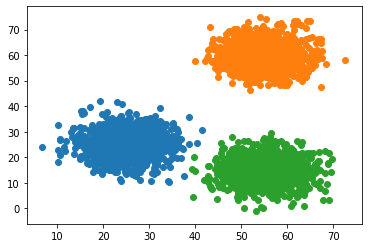

In [8]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

## K-means Uygulaması

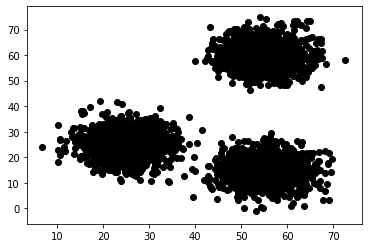

In [9]:
plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.scatter(x3,y3,color="black")
plt.show()

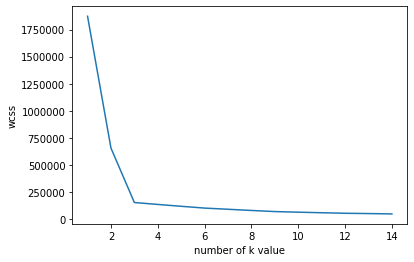

In [11]:
from sklearn.cluster import KMeans
wcss = []

# uygun k değerini bulmak, genelde dirsek yapan en uygunudur
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k value")
plt.ylabel("wcss")
plt.show()

* 3 değerinin dirsek olduğunu bu yüzden en uygun noktanın 3 olduğunu anladık.

In [13]:
# k=3 için modelim:
kmeas2 = KMeans(n_clusters=3)
clusters = kmeas2.fit_predict(data) # hem fit et, hem datayı üzerinde uygula
clusters # kümeledi

array([2, 2, 2, ..., 0, 0, 0])

In [14]:
data["label"] = clusters
data

,x,y,label
0,26.730615,22.374120,2
1,21.538562,28.626339,2
2,23.059703,29.017035,2
3,27.166269,12.730893,2
4,19.805370,27.531660,2
...,...,...,...
2995,55.930303,14.986892,0
2996,50.724157,13.904849,0
2997,60.114112,21.645107,0
2998,54.680244,18.857788,0


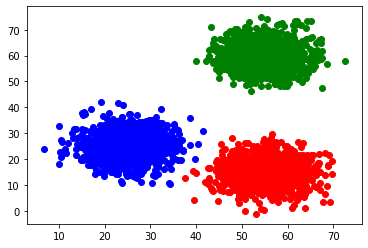

In [18]:
# şimdi grafik yaparak düzgün ayırıp ayırmadığına bakalım
plt.scatter(data.x[data.label == 0],data.y[data.label == 0],color="red")
plt.scatter(data.x[data.label == 1],data.y[data.label == 1],color="green")
plt.scatter(data.x[data.label == 2],data.y[data.label == 2],color="blue")
plt.show()

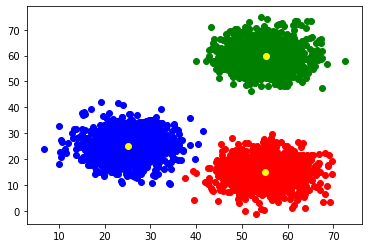

In [19]:
# centroidler
plt.scatter(data.x[data.label == 0],data.y[data.label == 0],color="red")
plt.scatter(data.x[data.label == 1],data.y[data.label == 1],color="green")
plt.scatter(data.x[data.label == 2],data.y[data.label == 2],color="blue")
plt.scatter(kmeas2.cluster_centers_[:,0],kmeas2.cluster_centers_[:,1],color="yellow")
plt.show()